# Text Classification with AG news (Logistic Regression vs Naive Bayes)

In this project I build a text classification model using the AG News Data Set. The goal was to compare two models Logistic Regression and Naive Bayes and to see which one performs better.
The project is based on concepts I learned from the course Machine Learning by deeplearning.ai

### Tools

In [64]:
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from collections import Counter

### Load and Insepct the data set
This reads the AG news Data Set (train.csv), combines the title and description into one text column and maps numeric labels to category names

In [65]:
df = pd.read_csv("train.csv")
df["text"] = df["Title"].fillna("") + " " + df["Description"].fillna("")
labelmap = {1: "World", 2: "Sports", 3: "Business", 4: "Tech"}
df["label"] = df["Class Index"].map(labelmap)
df.head()

,Class Index,Title,Description,text,label
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli...",Wall St. Bears Claw Back Into the Black (Reute...,Business
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...,Carlyle Looks Toward Commercial Aerospace (Reu...,Business
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...,Oil and Economy Cloud Stocks' Outlook (Reuters...,Business
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...,Iraq Halts Oil Exports from Main Southern Pipe...,Business
4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco...","Oil prices soar to all-time record, posing new...",Business


### Preprocessing 
Cleans the text, converts to lowercase and removes punctuation/numbers so the model only sees words

In [66]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r"[^a-z\s]", "", text)
    return text
df["clean_text"] = df["text"].apply(clean_text)

### Exploratory Analysis - Category Distribution
This visualizes the dataset

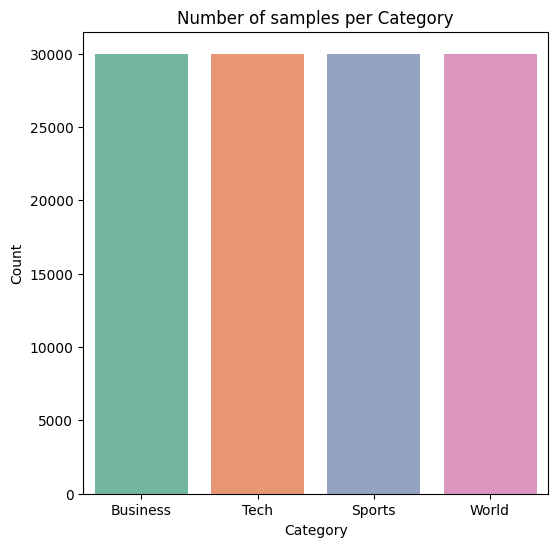

In [67]:
plt.figure(figsize=(6,6))
sns.countplot(
    x = "label", hue = "label", data = df,
    order = df["label"].value_counts().index,
    palette = "Set2", legend = False
)
plt.title("Number of samples per Category")
plt.xlabel("Category")
plt.ylabel("Count")
plt.show()

### Exploratory Analysis - Most Frequent Words
This also visualizes the dataset

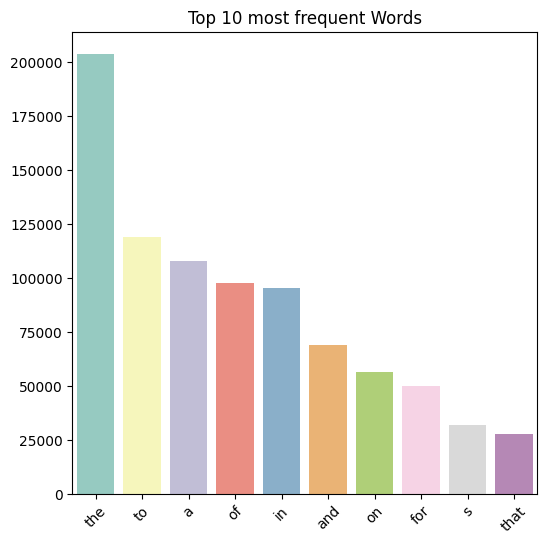

In [68]:
allwords = " ".join(df["clean_text"]).split()
wordFreq= Counter(allwords).most_common(10)
words, counts = zip(*wordFreq)

plt.figure(figsize = (6,6))
sns.barplot(x = list(words), y = list(counts),
            hue = list(words), palette = "Set3", legend = False)

plt.title("Top 10 most frequent Words")
plt.xticks(rotation = 45)
plt.show()


### Train/Test Split
Splits the data while keeping label balance

In [69]:
X_train, X_test, y_train, y_test = train_test_split (
    df["clean_text"],
    df["label"],
    test_size = 0.3,
    random_state = 42,
    stratify = df["label"]
)

### TF-IDF Vectorization
Converts cleaned text into numerical vectors using TF-IDF

In [70]:
vectorizer = TfidfVectorizer(max_features = 5000, stop_words = "english") # keeps 5000 most important features
X_train_v = vectorizer.fit_transform(X_train)
X_test_v = vectorizer.transform(X_test)

### Logistic Regression Model
This train and test LR model, print accuracy

In [71]:
lr = LogisticRegression(max_iter = 1000)
lr.fit(X_train_v, y_train)
y_predLregression = lr.predict(X_test_v)

print("\nLogistic Regression Results")
print("Accuracy:", accuracy_score(y_test, y_predLregression))
print(classification_report(y_test, y_predLregression))


Logistic Regression Results
Accuracy: 0.9071388888888889
              precision    recall  f1-score   support

    Business       0.88      0.88      0.88      9000
      Sports       0.95      0.97      0.96      9000
        Tech       0.88      0.88      0.88      9000
       World       0.92      0.90      0.91      9000

    accuracy                           0.91     36000
   macro avg       0.91      0.91      0.91     36000
weighted avg       0.91      0.91      0.91     36000



### Naive Bayes model
This also train and test NB model, print accuracy

In [72]:
nb = MultinomialNB ()
nb.fit(X_train_v, y_train)
y_predNbayes = nb.predict(X_test_v)

print("\nNaive Bayes Results")
print("Accuracy:", accuracy_score(y_test, y_predNbayes))
print(classification_report(y_test, y_predNbayes))


Naive Bayes Results
Accuracy: 0.8932222222222223
              precision    recall  f1-score   support

    Business       0.86      0.85      0.86      9000
      Sports       0.94      0.97      0.96      9000
        Tech       0.87      0.86      0.86      9000
       World       0.90      0.89      0.89      9000

    accuracy                           0.89     36000
   macro avg       0.89      0.89      0.89     36000
weighted avg       0.89      0.89      0.89     36000



### Confusion Matrix (Logistic Regression)
Visualize Logistic Regression predictions vs true labels

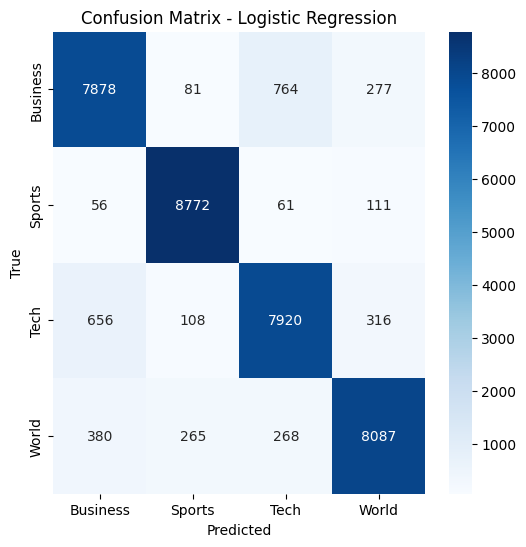

In [73]:
cm = confusion_matrix(y_test, y_predLregression, labels = lr.classes_)
plt.figure(figsize = (6,6))
sns.heatmap(
    cm, annot = True, fmt = "d", cmap = "Blues",
    xticklabels = lr.classes_, yticklabels = lr.classes_
)
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

### Prediction Helper

In [78]:
def predict_text(text, model = "logisticregression"):
    vec = vectorizer.transform([clean_text(text)])
    if model == "logisticregression":
        return lr.predict(vec)[0]
    elif model == "naivebayes":
        return nb.predict(vec)[0]

sample = "LinkPlus launches a new AI tool"
print("\nSample:", sample)
print("Logistic Regression:", predict_text(sample, "logisticregression"))
print("Naive Bayes:", predict_text(sample, "naivebayes"))


Sample: LinkPlus launches a new Sugar
Logistic Regression: Tech
Naive Bayes: Tech


### Compare Models 

In [79]:
acc_lregression = accuracy_score(y_test, y_predLregression)
acc_nbayes = accuracy_score(y_test, y_predNbayes)

if acc_lregression > acc_nbayes:
    print("\nLogistic regression performed better")
elif acc_nbayes > acc_lregression:
    print("\nNaive Bayes performed better")
else:
    print("\nBoth models performed equally")



Logistic regression performed better
